<a href="https://colab.research.google.com/github/jorgelorenz/personal_portfolio/blob/main/binomial_lognormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Log-normal approximation by binomial model

Our goal is to check this theorem [Shreve, 2004]:

Theorem 3.2.2: When $n → ∞$ the distribution of:
$$S_{n}(t)=S(0)·u_{n}^{H_{nt}}d_{n}^{T_{nt}}$$ \\
with $u=1+\frac{\sigma}{\sqrt{n}}$ and $d=1-\frac{\sigma}{\sqrt{n}}$ and the $H_{i}$ y $T_{i}$ random variable binomial with $p=q=1/2$ converges to the distribution of:
$$ S(t)=S(0)·exp\lbrace \sigma W(t) - \frac{1}{2}\sigma^{2}t\rbrace $$



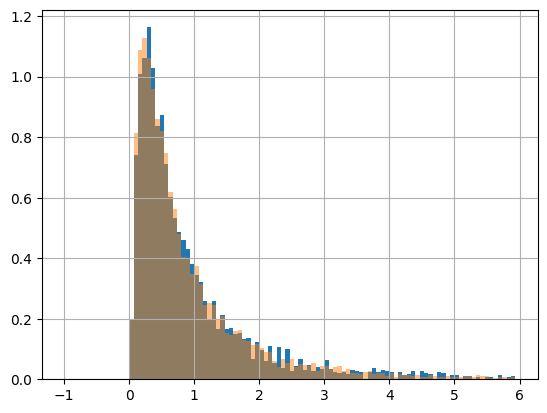

In [ ]:
from re import I

import random as rand
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import numpy as np

n_samples = 10000
tolerance = 0.1

###Parameter scaled symmetric random walk
S0 = 1
T=1
n = 10000
sigma = 1
u = 1 + sigma/m.sqrt(n)
d = 1 - sigma/m.sqrt(n)

average = 0
values=[]
for sample in range(n_samples):
  S = S0
  for i in range(n):
    if rand.random() > 0.5:
      S *= u
    else:
      S *= d

  values.append(S)

data = {'valores': values}
df = pd.DataFrame(data)

##### Parameters log-normal
standar_dev = sigma**2*T
mean = -1/2*sigma**2*T

v1 = pd.Series(list(map(lambda x: S0*m.exp(x), np.random.normal(mean, standar_dev, 10000))))
plt.figure()
hist = df['valores'].hist(bins=list(map(lambda x: x/15, range(-15,90))), density=True)
plt.hist(v1, density=True, bins=list(map(lambda x: x/15, range(-15,90))), alpha=0.5)
plt.show()